In [2]:
#Display hel1.pma
import sys
import os
import numpy as np
import struct
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


In [3]:
file_path = "../hel12.pma"
with open(file_path, 'rb') as file:
    data = file.read()
    

In [4]:
def read_pma_f0(file_path):
    try:
        with open(file_path, "rb") as f:
            #Assign X_pixels and Y_pixels as the first two 16-bit integers in the file
            #<:little-endian (least significant byte first), HH:two 16-bit integers
            X_pixels, Y_pixels = struct.unpack("<HH", f.read(4))
            print(f"Image Size: {X_pixels} x {Y_pixels}")
            
            #Calc number of frames
            f.seek(0, 2) #sets pointer to end of file .seek(offset, from_what)
            filesize = f.tell() #returns current (end) position of pointer
            Nframes = (filesize - 4) // (X_pixels * Y_pixels)  #Assuming 4-byte header
            f.seek(0, 4) #Reset file pointer to immediately after 4 byte header

            #Read the binary image data
            frame_data0 = f.read(X_pixels * Y_pixels)
            #Convert the frame data into a 2D numpy array of size (Y_pixels, X_pixels)
            image_data = np.frombuffer(frame_data0, dtype=np.uint8).reshape((Y_pixels, X_pixels))

            return image_data

    except Exception as e:
        print(f"Error reading .pma file: {e}")
        return None

Image Size: 512 x 512


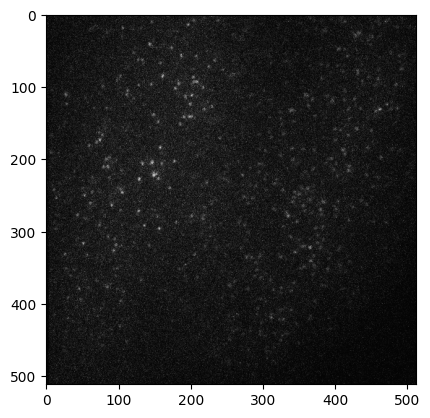

In [5]:
image_data = read_pma_f0(file_path)
plt.imshow(image_data, cmap='gray')
plt.show()


In [6]:
print(f"Frame 0 data object type: {type(image_data)}")
print(f"Frame 0 data dimensions: {image_data.shape}")
print(f"Element type: {image_data.dtype}")
print(f"Frame 0, row 0\n{image_data[0,:]}") #prints first row
print(f"Frame 0 max element value: {image_data.max()}") #prints max value within 1st image

Frame 0 data object type: <class 'numpy.ndarray'>
Frame 0 data dimensions: (512, 512)
Element type: uint8
Frame 0, row 0
[ 0  2  0  2  2  6  3 12 11  8  3  2  2  6 15  3 14 21  3  2  8  3  2  5
  6  8  8  3 12 12  3 11  3 14  7 18  7  2  3 11 17 12  2  4 27  4 13 17
  6 30  4  4  5  9 15  9 12 12  3  5  8 12  2  6 16  2  2  2  4  7  7  7
 20  2  2  6 19  6  6  6 10  2  6 10  7 14  5 15  9  4 12 13  9  5  5 17
  5  6 10 15  6  6  8  7 11  7 11 16 18  7 14  6 23 10 17  9  9  8  5 16
 29 15  6  8  7 26  4  8 11  8 17 16 10 10  7  3 12 15  3  8  3 10 13  9
  8 15 11 14  4 19  9 19 12  6 19 14 10 16 11  8 12  9 12  6  8  8  5 16
  8  4  6 10 11  7 10  8 12 14 13 20 17  9  3 28  9  8 17  5 17 10 10  8
 10 15 19 10  7  7  8 17  4  6 16 12 10  7 13 17  6 13 13  5  4 15 17 15
 25  6  2 15 14 16 16 15 21 11  7 17 11 14 37 33 13 19 22 14  5 27 17 19
  5 10 15  7 14 14 17 13 18  9 11  4 11  7 11  3 10 17  9 14 10 12 10  7
  3 12  8 17 11  2  6  9 12 10  6 13 23  5 13  9  7 16  7  7 11  4 13 19
  8

In [7]:
def read_pma(file_path):
    try:
        with open(file_path, "rb") as f:
            #Assign X_pixels and Y_pixels as the first two 16-bit integers in the file
            #<:little-endian (least significant byte first), HH:two 16-bit integers
            X_pixels, Y_pixels = struct.unpack("<HH", f.read(4))
            print(f"Image Size: {X_pixels} x {Y_pixels}")
            
            #Calc number of frames
            f.seek(0, 2) #sets pointer to end of file .seek(offset, from_what)
            filesize = f.tell() #returns current (end) position of pointer
            Nframes = (filesize - 4) // (X_pixels * Y_pixels)  #Assuming 4-byte header
            f.seek(0, 4) #Reset file pointer to immediately after 4 byte header

            #Return a list of 2D numpy arrays, each representing a frame
            return [np.frombuffer(f.read(X_pixels * Y_pixels), dtype=np.uint8).reshape((Y_pixels, X_pixels)) for frame_idx in range(Nframes)]

    except Exception as e:
        print(f"Error reading .pma file: {e}")
        return None

Image Size: 512 x 512


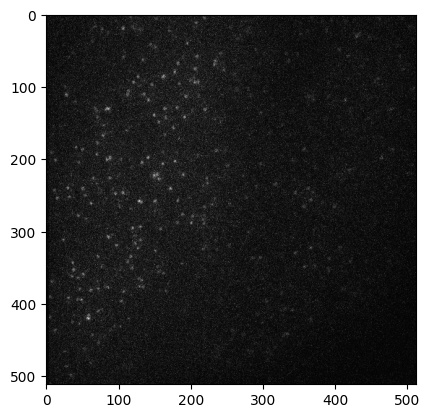

Frames data object type: <class 'list'>
Number of frames: 250
Frame 0 data array: [[ 0  2  0 ... 16  3  8]
 [ 5  9  2 ... 17  2 11]
 [ 4  9  4 ...  6 14  8]
 ...
 [ 5  5  3 ...  6  2  2]
 [ 3  2  2 ... 10  1  1]
 [ 2  3  3 ... 10  2  7]]


In [8]:
Frames_data = read_pma(file_path)
# plt.imshow(Frames_data[0], cmap='gray')
plt.imshow(Frames_data[-1], cmap='gray')
plt.show()
print(f"Frames data object type: {type(Frames_data)}")
print(f"Number of frames: {len(Frames_data)}")
print(f"Frame 0 data array: {Frames_data[0]}")

In [15]:
def generate_images(file_path, output_path='output_png'):
    try:
        Frames_data = read_pma(file_path)
        for frame_idx, frame_data in enumerate(Frames_data):
            plt.imsave(f"{output_path}/frame_{frame_idx}.png", frame_data, cmap='gray')

    except Exception as e:
        print(f"Error generating images: {e}")
        return None

In [16]:
generate_images(file_path, output_path='output_png')

Image Size: 512 x 512


In [37]:
def generate_video(path, video_name):
    try: 
        images = [img for img in os.listdir(path) if img.endswith(".png")]
        images.sort(key=lambda x: int(x.split("_")[1].split(".")[0]))
        frame = cv2.imread(os.path.join(path, images[0]))
        height, width, layers = frame.shape
        video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), 1, (width, height))

        for image in images:
            video.write(cv2.imread(os.path.join(path, image)))

        video.release()
        cv2.destroyAllWindows()

        print(f"Video sucessfully generated and saved as: {video_name}")
        print(f"Images: {(images)}")
    
    except Exception as e:
        print(f"Error generating video: {e}")
        return None


In [38]:
generate_video('output_png', 'output_video.mp4')

Video sucessfully generated and saved as: output_video.mp4
Images: ['frame_0.png', 'frame_1.png', 'frame_2.png', 'frame_3.png', 'frame_4.png', 'frame_5.png', 'frame_6.png', 'frame_7.png', 'frame_8.png', 'frame_9.png', 'frame_10.png', 'frame_11.png', 'frame_12.png', 'frame_13.png', 'frame_14.png', 'frame_15.png', 'frame_16.png', 'frame_17.png', 'frame_18.png', 'frame_19.png', 'frame_20.png', 'frame_21.png', 'frame_22.png', 'frame_23.png', 'frame_24.png', 'frame_25.png', 'frame_26.png', 'frame_27.png', 'frame_28.png', 'frame_29.png', 'frame_30.png', 'frame_31.png', 'frame_32.png', 'frame_33.png', 'frame_34.png', 'frame_35.png', 'frame_36.png', 'frame_37.png', 'frame_38.png', 'frame_39.png', 'frame_40.png', 'frame_41.png', 'frame_42.png', 'frame_43.png', 'frame_44.png', 'frame_45.png', 'frame_46.png', 'frame_47.png', 'frame_48.png', 'frame_49.png', 'frame_50.png', 'frame_51.png', 'frame_52.png', 'frame_53.png', 'frame_54.png', 'frame_55.png', 'frame_56.png', 'frame_57.png', 'frame_58.png'